In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
datasetDict = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetDict[filename] = dirname+'/'+filename
# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Foundations/Project/credit.csv')

In [3]:
df.columns = [x.replace(" ", "_") for x in df.columns]

# 1. Data Understanding

### 1.1 Data Semantics

In [4]:
df = df.drop_duplicates()
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [5]:
for index in df[df['Current_Loan_Amount']==99999999].index:
    df.loc[index,'Current_Loan_Amount'] = np.nan

df.loc[df['Maximum_Open_Credit']==0,'Maximum_Open_Credit'] = np.nan

In [6]:
df['Home_Ownership']=df['Home_Ownership'].replace({'HaveMortgage':'Have Mortgage'})

In [7]:
df.Credit_Score[df.Credit_Score>=5000] = df.Credit_Score[df.Credit_Score>=6000]/10

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df['Years_in_current_job']=df['Years_in_current_job'].str.lower()
df['Loan_Status']=df['Loan_Status'].str.lower()
df['Term']=df['Term'].str.lower()
df['Home_Ownership']=df['Home_Ownership'].str.lower()
df['Purpose']=df['Purpose'].str.lower()

In [9]:
df = df[:89785]

In [10]:
print('Types of columns\n', df.dtypes)
print('\nNumber of columns', len(df.columns))
print('\nCount of column types\n', df.dtypes.value_counts())
print('\nAll values\n', df.count())
print('\nNull values for columns\n', df.isna().sum())

Types of columns
 Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount             float64
Term                             object
Credit_Score                    float64
Annual_Income                   float64
Years_in_current_job             object
Home_Ownership                   object
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts         float64
Number_of_Credit_Problems       float64
Current_Credit_Balance          float64
Maximum_Open_Credit             float64
Bankruptcies                    float64
Tax_Liens                       float64
dtype: object

Number of columns 19

Count of column types
 float64    12
object      7
dtype: int64

All values
 Loan_ID                         89785
Customer_ID                     89785
Loan_Status                     

As concerns data semantics, there are **100000 rows** (89785 after we elimates rows made completely of NaN and duplicates) and **19 columns** in this dataset.
The numerical variables are 13, while the categorical ones are 6.

The numeric ones divide in:

**Discrete**: Years_in_current_job, Number_of_Open_Accounts, Bankruptcies, Tax_Liens, Number_of_Credit_Problems, Months_since_last_delinquent

**Continuous**: Current_Loan_Amount, Credit_Score, Annual_Income, Monthly_Debt,  Current_Credit_Balance, Maximum_Open_Credit, Years_of_Credit_History

The categorical ones divide in:

**Identification numbers**: Loan_ID, Customer_ID

**Nominal**: Loan_Status, Term, Home_Ownership, Purpose

Identification numbers aren't useful for the analysis, so they should be removed


99999999 values in Current_Loan_Amount are to be considered missing values

Values between 6000 and 8000 in Credit_Score are clearly mistyped since all the other values are around 600-1000, so we should divide them by 10

In [11]:
cont_var = ['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Months_since_last_delinquent', 'Years_of_Credit_History', 'Number_of_Open_Accounts']
cat_or_dis_var = ['Years_in_current_job', 'Bankruptcies', 'Tax_Liens', 'Number_of_Credit_Problems','Loan_Status', 'Term', 'Home_Ownership', 'Purpose']

In [12]:
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,fully paid,445412.0,short term,709.0,1167493.0,8 years,home mortgage,home improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,fully paid,262328.0,short term,NaN,NaN,10+ years,home mortgage,debt consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,fully paid,NaN,short term,741.0,2231892.0,8 years,own home,debt consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,fully paid,347666.0,long term,721.0,806949.0,3 years,own home,debt consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,fully paid,176220.0,short term,NaN,NaN,5 years,rent,debt consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89780,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,fully paid,210584.0,short term,719.0,783389.0,1 year,home mortgage,other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
89781,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,fully paid,NaN,short term,732.0,1289416.0,1 year,rent,debt consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
89782,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,fully paid,103136.0,short term,742.0,1150545.0,6 years,rent,debt consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
89783,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,fully paid,530332.0,short term,746.0,1717524.0,9 years,rent,debt consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


### 1.2 Distribution of the variables and statistics 

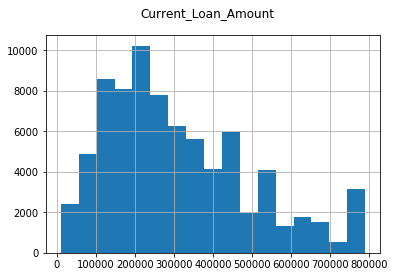

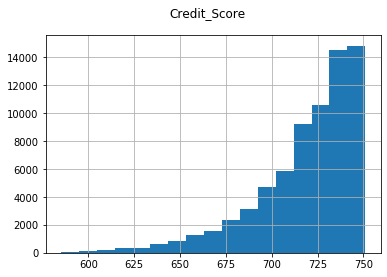

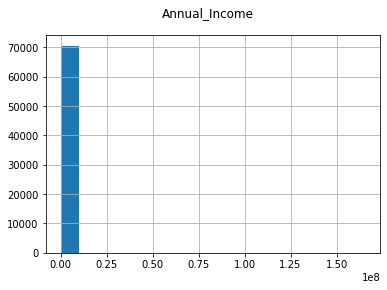

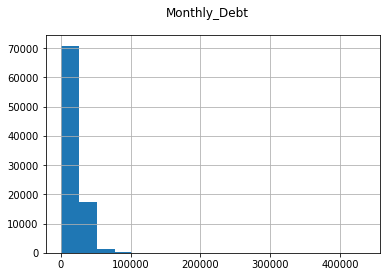

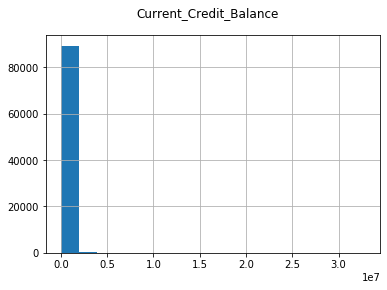

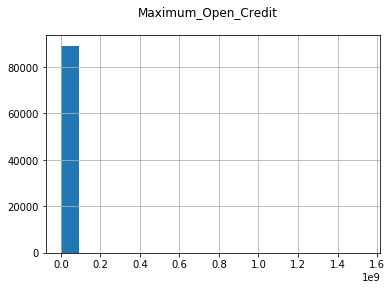

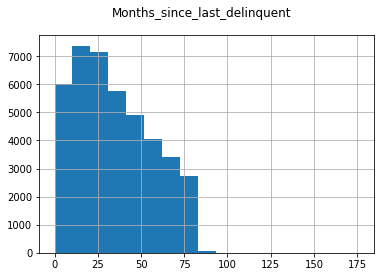

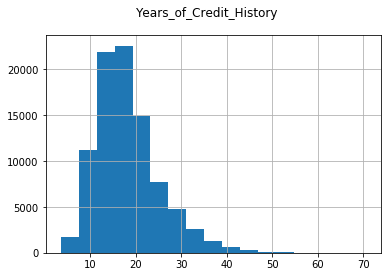

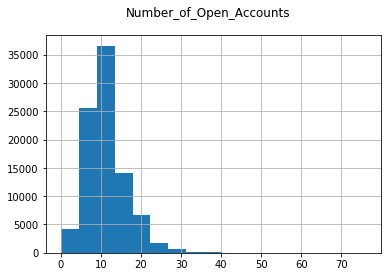

In [13]:
n=len(df)
for column in cont_var:
    plt.figure()
    df[column].hist(bins=int(np.log2(n))+1)
    pl.suptitle(column)

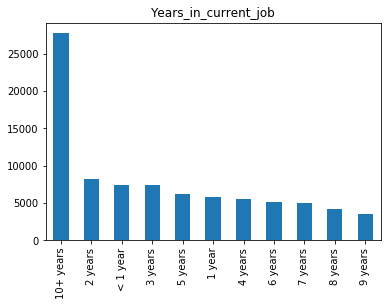

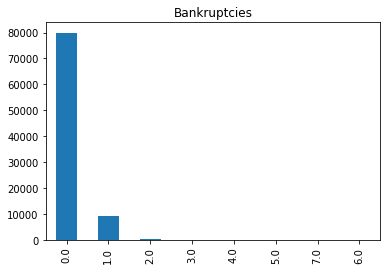

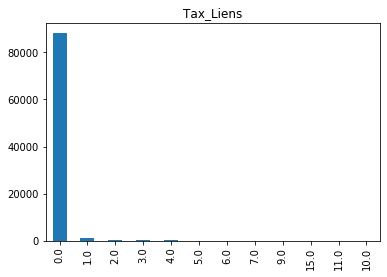

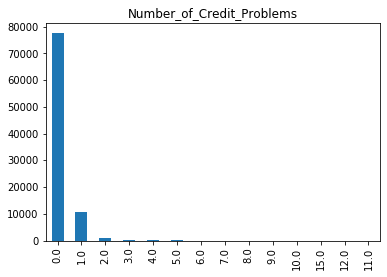

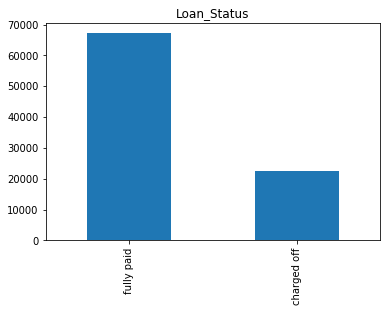

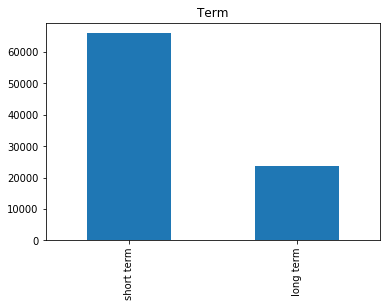

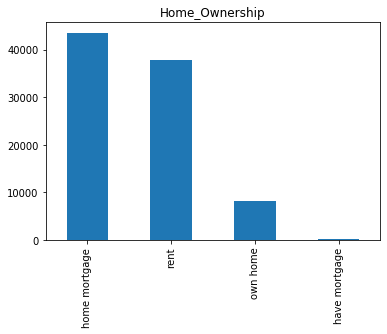

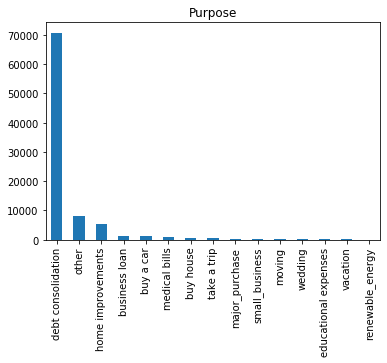

In [14]:
for column in cat_or_dis_var:
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=column)

Text(0, 0.5, 'Loan Status')

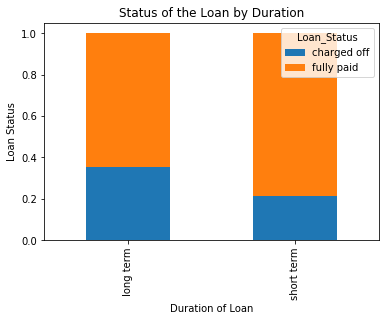

In [15]:
embarked_val_xt = pd.crosstab(df['Term'], df['Loan_Status'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Status of the Loan by Duration')
plt.xlabel('Duration of Loan')
plt.ylabel('Loan Status')

Text(0, 0.5, 'Loan Status')

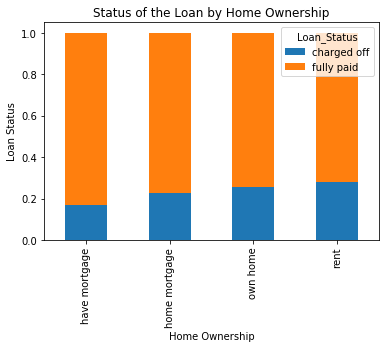

In [16]:
embarked_val_xt = pd.crosstab(df['Home_Ownership'], df['Loan_Status'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Status of the Loan by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')

### 1.3 Assessing data quality (missing values, outliers)
 #### 1.3.1 Missing values

In [17]:
#Set missing values to match the distribution of the other occurencies
def missingToDistribution(column, columname):
    currentDistribution = column.value_counts(normalize=True) #current distribution
    missingValues = column.isnull() #Missing Values
    df.loc[missingValues,columname] = np.random.choice(currentDistribution.index, size=len(df[missingValues]),p=currentDistribution.values) #replace with probability p the values with the distribution

# Call missingToDistribution on Transmission, WheelTypeID and Color

missingToDistribution(df.Years_in_current_job, 'Years_in_current_job')

In [18]:
#df[df['Bankruptcies'].isnull()]['Number_of_Credit_Problems'].unique()

In [19]:
#df.loc[df['Number_of_Credit_Problems'] == 0,'Bankruptcies'] = 0

In [20]:
#currentDistribution = df[(df['Number_of_Credit_Problems'] == 1)]['Bankruptcies'].value_counts(normalize=True)
#missingValues = df.Bankruptcies.isnull() #Missing Values
#df.loc[missingValues,'Bankruptcies'] = np.random.choice(currentDistribution.index, size=len(df[missingValues]),p=currentDistribution.values) #replace with probability p the values with the distribution

Since Number_of_Credit_Problems can't be lower than Bankruptcies, we assign value 0 if Number_of_Credit_Problems=0 and according to the distribution of records that has Number_of_Credit_Problems=1 if Number_of_Credit_Problems=1 

In [21]:
x = df.Annual_Income.mean()
y = df.Current_Loan_Amount.mean()
z = df.Maximum_Open_Credit.mean()
t = df.Credit_Score.mean()

df.loc[df.Annual_Income.isnull(),'Annual_Income'] = x
df.loc[df.Current_Loan_Amount.isnull(),'Current_Loan_Amount'] = y
df.loc[df.Maximum_Open_Credit.isnull(),'Maximum_Open_Credit'] = z
df.loc[df.Credit_Score.isnull(),'Credit_Score'] = t

In [22]:
print('\nNull values for columns\n', df.isna().sum())


Null values for columns
 Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job                0
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    48337
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      190
Tax_Liens                           9
dtype: int64


#### 1.3.2 Outliers

In [23]:
df = df[(df['Annual_Income'] <= 100000000) & (df['Monthly_Debt'] <= 200000)]

In [24]:
(df['Number_of_Credit_Problems']>3)

0        False
1        False
2        False
3        False
4        False
         ...  
89780    False
89781    False
89782    False
89783    False
89784    False
Name: Number_of_Credit_Problems, Length: 89781, dtype: bool

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/anaconda3/lib/python3.7/site-packages/matp

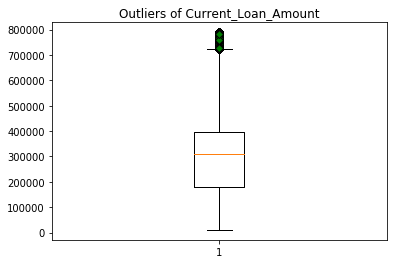

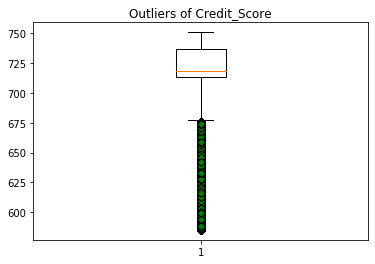

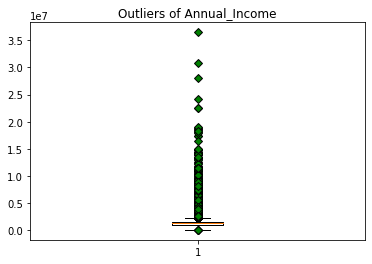

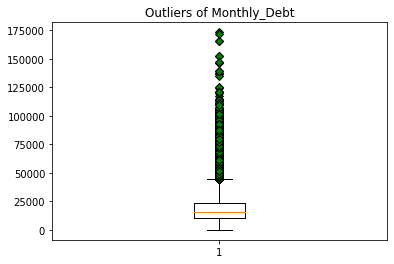

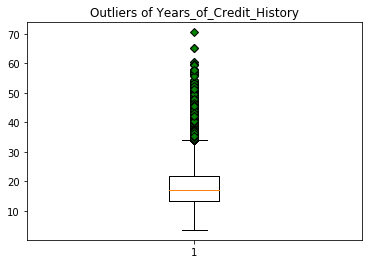

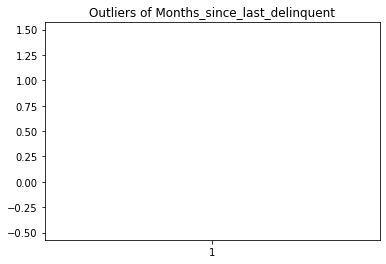

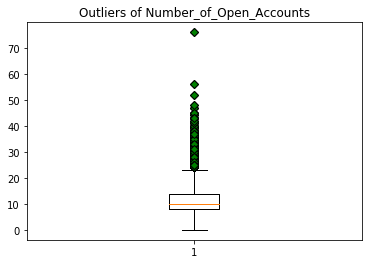

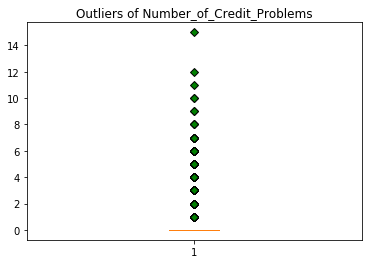

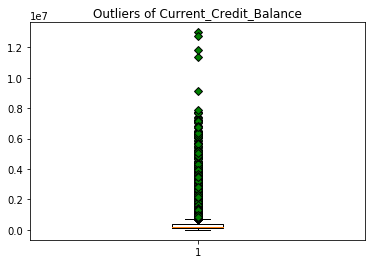

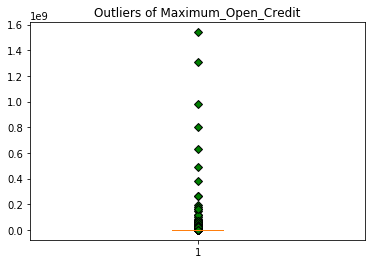

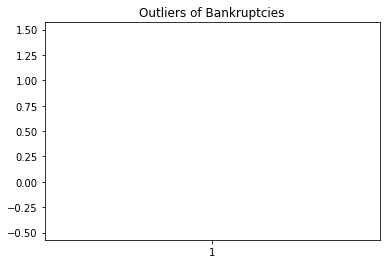

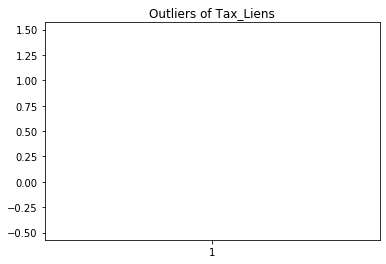

In [25]:
for column in df:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        gd = dict(markerfacecolor='g', marker='D')
        fig, ax = plt.subplots()
        ax.set_title('Outliers of ' +column)
        ax.boxplot(df[column], flierprops=gd)

In [26]:
df = df[(df['Credit_Score'] >= 640) & (df['Annual_Income'] <= 4000000) & (df['Annual_Income'] >= 300000) & (df['Monthly_Debt'] <= 50000) & (df['Number_of_Open_Accounts'] <= 27) & (df['Years_of_Credit_History'] <= 36) & (df['Current_Credit_Balance'] <= 1500000) & (df['Maximum_Open_Credit'] <= 2000000) & (df['Number_of_Credit_Problems']<=3)]


In [27]:
df.loc[df.Annual_Income == x,'Annual_Income'] = np.nan
df.loc[df.Current_Loan_Amount == y,'Current_Loan_Amount'] = np.nan
df.loc[df.Maximum_Open_Credit == z,'Maximum_Open_Credit'] = np.nan
df.loc[df.Credit_Score == t,'Credit_Score'] = np.nan

In [28]:
missingToDistribution(df.Annual_Income, 'Annual_Income')
missingToDistribution(df.Current_Loan_Amount, 'Current_Loan_Amount')
missingToDistribution(df.Maximum_Open_Credit, 'Maximum_Open_Credit')
missingToDistribution(df.Credit_Score, 'Credit_Score')

In [29]:
#df.loc[df.Annual_Income.isnull(),'Annual_Income'] = df.Annual_Income.mean()
#df.loc[df.Current_Loan_Amount.isnull(),'Current_Loan_Amount'] = df.Current_Loan_Amount.mean()
#df.loc[df.Maximum_Open_Credit.isnull(),'Maximum_Open_Credit'] = df.Maximum_Open_Credit.mean()
#df.loc[df.Credit_Score.isnull(),'Credit_Score'] = df.Credit_Score.mean()

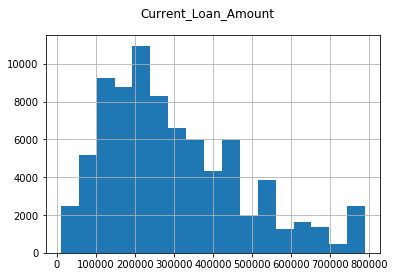

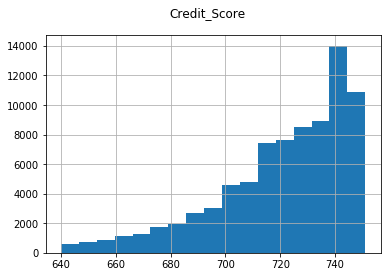

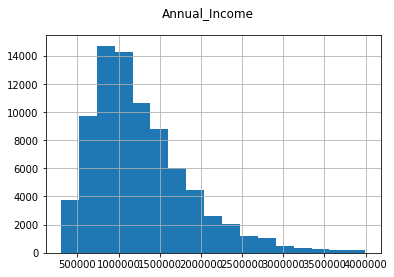

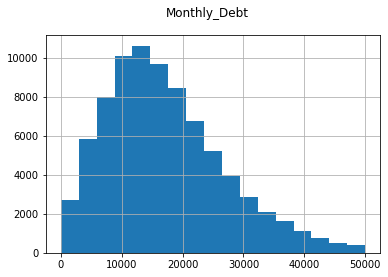

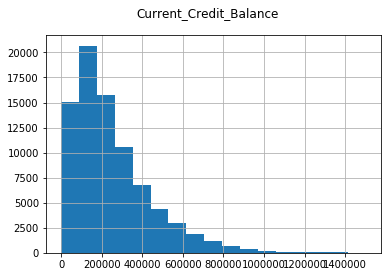

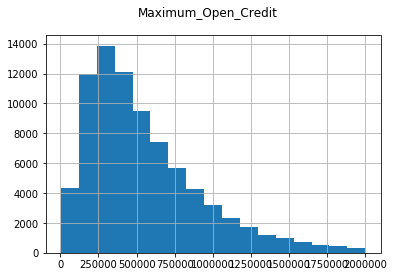

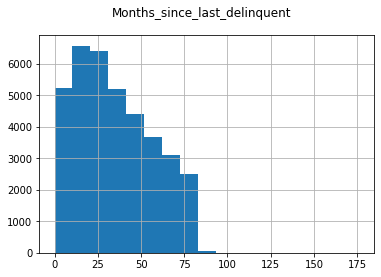

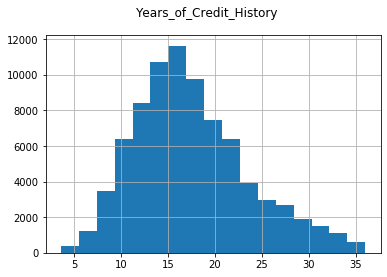

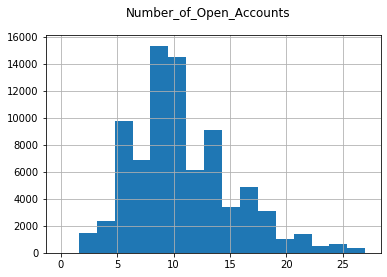

In [30]:
n=len(df)
for column in cont_var:
    plt.figure()
    df[column].hist(bins=int(np.log2(n))+1)
    pl.suptitle(column)

In [31]:
df.loc[df['Purpose']=='Other', 'Purpose'] = 'other'
df.loc[df['Purpose']=='Take a Trip', 'Purpose'] = 'vacation'
df.loc[df['Purpose']=='small_business', 'Purpose'] = 'business loan'
df.loc[df['Purpose']=='moving', 'Purpose'] = 'buy house'
df.loc[df['Purpose']=='major_purchase', 'Purpose'] = 'other'
df.loc[df['Purpose']=='renewable_energy', 'Purpose'] = 'other'
df.loc[df['Purpose']=='Educational Expenses', 'Purpose'] = 'other'
df.loc[df['Purpose']=='wedding', 'Purpose'] = 'other'

In [32]:
df.loc[df['Home_Ownership']=='have mortgage', 'Home_Ownership'] = 'home mortgage'

In [33]:
df.loc[df['Years_in_current_job']=='1 year', 'Years_in_current_job'] = '1-5 years'
df.loc[df['Years_in_current_job']=='2 years', 'Years_in_current_job'] = '1-5 years'
df.loc[df['Years_in_current_job']=='3 years', 'Years_in_current_job'] = '1-5 years'
df.loc[df['Years_in_current_job']=='4 years', 'Years_in_current_job'] = '1-5 years'
df.loc[df['Years_in_current_job']=='5 years', 'Years_in_current_job'] = '1-5 years'
df.loc[df['Years_in_current_job']=='6 years', 'Years_in_current_job'] = '6-10 years'
df.loc[df['Years_in_current_job']=='7 years', 'Years_in_current_job'] = '6-10 years'
df.loc[df['Years_in_current_job']=='8 years', 'Years_in_current_job'] = '6-10 years'
df.loc[df['Years_in_current_job']=='9 years', 'Years_in_current_job'] = '6-10 years'

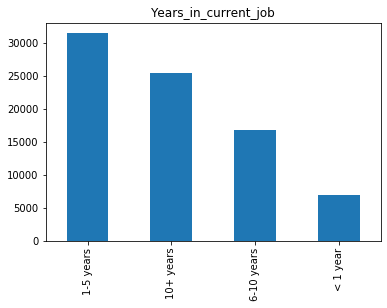

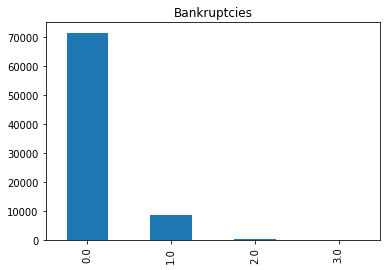

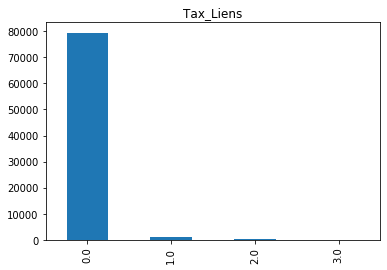

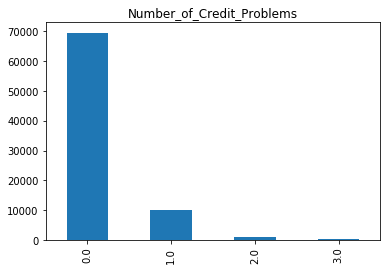

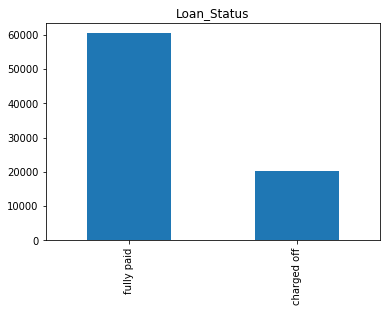

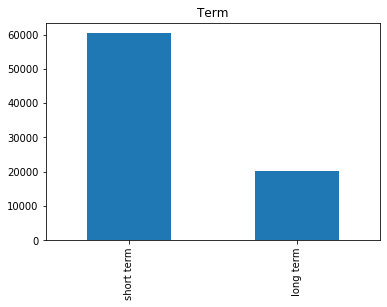

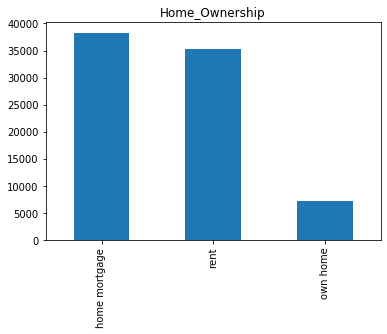

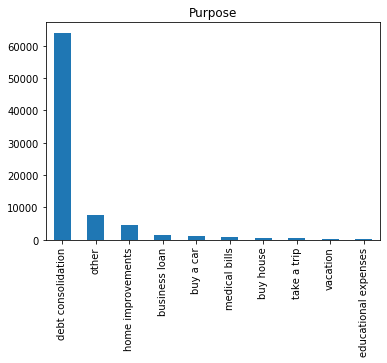

In [34]:
for column in cat_or_dis_var:
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=column)

In [35]:
df.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.138292,0.302018,0.363523,0.128328,-0.023526,0.154109,-0.070814,0.377714,0.344225,-0.082979,0.014462
Credit_Score,-0.138292,1.000000,0.019279,-0.073563,0.064946,0.033982,-0.020260,-0.046467,-0.025809,0.107936,-0.031035,-0.023268
Annual_Income,0.302018,0.019279,1.000000,0.414015,0.158024,-0.058790,0.130712,-0.015929,0.264350,0.256091,-0.033537,0.031931
Monthly_Debt,0.363523,-0.073563,0.414015,1.000000,0.177831,-0.046945,0.416491,-0.049997,0.499832,0.366602,-0.066218,0.020203
Years_of_Credit_History,0.128328,0.064946,0.158024,0.177831,1.000000,-0.037232,0.111836,0.082820,0.236199,0.249207,0.087100,0.018752
Months_since_last_delinquent,-0.023526,0.033982,-0.058790,-0.046945,-0.037232,1.000000,-0.032478,0.103892,0.000835,-0.021653,0.115776,0.005902
Number_of_Open_Accounts,0.154109,-0.020260,0.130712,0.416491,0.111836,-0.032478,1.000000,-0.002514,0.293566,0.416925,-0.011466,0.013195
Number_of_Credit_Problems,-0.070814,-0.046467,-0.015929,-0.049997,0.082820,0.103892,-0.002514,1.000000,-0.167431,-0.150687,0.814849,0.462216
Current_Credit_Balance,0.377714,-0.025809,0.264350,0.499832,0.236199,0.000835,0.293566,-0.167431,1.000000,0.725871,-0.169227,-0.022836
Maximum_Open_Credit,0.344225,0.107936,0.256091,0.366602,0.249207,-0.021653,0.416925,-0.150687,0.725871,1.000000,-0.153618,-0.015761


[Text(0.5, 0, 'Current_Loan_Amount'),
 Text(1.5, 0, 'Credit_Score'),
 Text(2.5, 0, 'Annual_Income'),
 Text(3.5, 0, 'Monthly_Debt'),
 Text(4.5, 0, 'Years_of_Credit_History'),
 Text(5.5, 0, 'Months_since_last_delinquent'),
 Text(6.5, 0, 'Number_of_Open_Accounts'),
 Text(7.5, 0, 'Number_of_Credit_Problems'),
 Text(8.5, 0, 'Current_Credit_Balance'),
 Text(9.5, 0, 'Maximum_Open_Credit'),
 Text(10.5, 0, 'Bankruptcies'),
 Text(11.5, 0, 'Tax_Liens')]

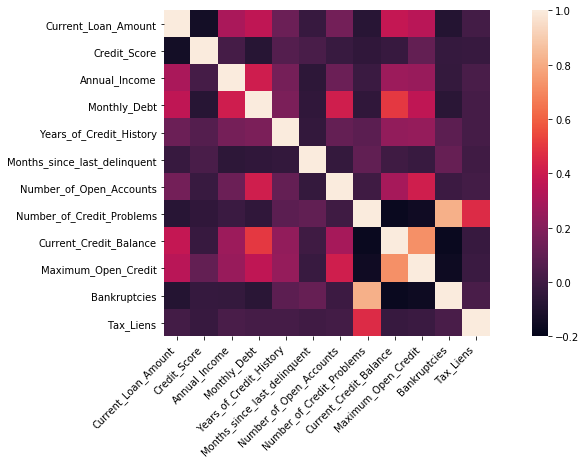

In [36]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (15,6))
ax = sns.heatmap(corr, vmin=-0.2, vmax=1,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [37]:
del df['Loan_ID'] #identification number, useless
del df['Customer_ID'] #identification number, useless
del df['Bankruptcies'] #highly correlated with Number_of_Credit_Problems
del df['Months_since_last_delinquent'] #more than 50% of missing values
del df['Tax_Liens'] #extremely unbalanced

In [38]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [39]:
df

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
0,fully paid,445412.0,short term,709.0,1167493.0,6-10 years,home mortgage,home improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0
1,fully paid,211464.0,short term,741.0,2231892.0,6-10 years,own home,debt consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0
2,fully paid,347666.0,long term,721.0,806949.0,1-5 years,own home,debt consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0
3,fully paid,176220.0,short term,732.0,1175929.0,1-5 years,rent,debt consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0
4,charged off,206602.0,short term,729.0,896857.0,10+ years,home mortgage,debt consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80718,fully paid,210584.0,short term,719.0,783389.0,1-5 years,home mortgage,other,3727.61,17.4,6.0,0.0,456.0,259160.0
80719,fully paid,219472.0,short term,732.0,1289416.0,1-5 years,rent,debt consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0
80720,fully paid,103136.0,short term,742.0,1150545.0,6-10 years,rent,debt consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0
80721,fully paid,530332.0,short term,746.0,1717524.0,6-10 years,rent,debt consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0


In [40]:
df.to_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Foundations/Project/cleaned_credit.csv', header=True, index=False) 

In [41]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [42]:
for index in df.index:
    if df['Loan_Status'][index]=='fully paid':
        df.loc[index,'Loan_Status'] = 1
    else:
        df.loc[index,'Loan_Status'] = 0

In [43]:
df2 = df[['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Years_of_Credit_History', 'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Loan_Status']]

In [44]:
class_name = 'Loan_Status'
attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y = df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [45]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [46]:
X_train_pca.shape

(56506, 2)

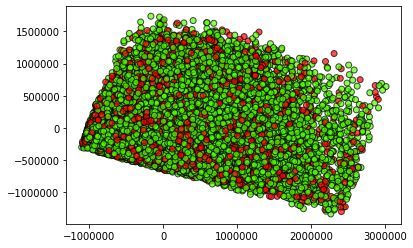

In [47]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()